<a href="https://colab.research.google.com/github/HaydenJF/CPSC392-HW1/blob/main/Copy_of_HW1_SP22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1

GENERAL INSTRUCTIONS:

- For all ggplots, make sure you make changes so that the data viz is effective, clear, and does not contain distracting elements, graphs will be graded both on correctness (did you plot the right hting) as well as on effectiveness (does this graph thoughtfully demonstrate the principles we learned in our data viz lectures).
- CLEARLY mark where you are answering each question (see [here](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Extras/HW1_Format%20Example.ipynb) for an example format).
- Show all code necessary for the analysis, but remove superfluous code

---

Using the dataset linked [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv), <strong>build a linear regression model to predict *reaction time* from a lab based cognitive task (reaction time refers to the amount of time it takes a person to react after seeing a stimuli on a screen) based on all the other variables.</strong>


### Variables
- age: age in years (Continuous)
- boredom_rating: a scale of 0-100 with 0 being completely not bored, 100 is completely bored (Continuous)
- risk_propensity: a scale of 0-28 where higher scored indicate a person is more likely to take risks (Continuous)
- height: height in cm (Continuous)
- left_handed: 0 if the person is right handed, 1 if they are left handed (boolean)
- reaction_time: reaction time in ms (Continuous)


### Instructions
<ul> 
<li> a) use an 80/20 train test split for model validation and make sure you z score your continuous/interval variables ONLY 
<li> b) check the linearity assumption for your continuous variables using ggplot (using all the training data). <strong>Discuss</strong> in detail what you are checking for and specifically what you see for this model (regardless of the results, continue building the linear regression model, as we do not have any other alternatives yet). 
<li> c) check the assumption of homoscedasticity by plotting predicted reaction times and residuals using ggplot (using the training set). <strong>Discuss</strong> in detail what you are checking for and what patterns you see specifically for this model.
<li> d) plot the actual vs. predicted reaction times (for both train an test set separately), as well as print out the mean <em>absolute</em> error for both <em>train</em> and <em>test</em> and $R^2$ for your model for both <em>train</em> and <em>test</em>. <strong>Discuss</strong> how well your model did based on these metrics, and how can you tell.
<li> e) is your model overfit? <strong>Discuss</strong> in detail how you can tell.
<li> f) use ggplot to make a bar chart showing the coefficient values (x should be each coef name, the height of each bar should be the value of the coefficient). DO NOT include the intercept in this plot. Briefly <strong>discuss</strong> the impact of each variable on reaction time.
</ul> 

Feel free to add cells to this notebook in order to execute the code, but for parts b,c, and d, make sure you put the discussion part in a *Markdown* cell, do not use code comments to answer. 

In [1]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
#model evaluation

from sklearn.model_selection import train_test_split # TTS 

%matplotlib inline

db = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv")
db.head()

,age,boredom_rating,risk_propensity,height,left_handed,reaction_time
0,34,78.87,10.53,146.79,0,900.949930
1,38,4.84,14.64,169.44,0,900.668926
2,38,23.52,14.17,167.76,1,901.703988
3,27,45.65,15.98,171.15,0,899.406904
4,34,0.88,10.58,158.15,0,899.728326


a) use an 80/20 train test split for model validation and make sure you z score your continuous/interval variables ONLY 


In [2]:
predictors = ["age", "boredom_rating", "risk_propensity", "height", "left_handed"]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(db[predictors], 
                                                    db["reaction_time"], 
                                                    test_size = 0.2, 
                                                    random_state = 42)
#42 is the answer to Life, The Universe and 
#Everything and this model is the question :)

#continous variables for Z scoring
continous_variables = ["age", "boredom_rating", "risk_propensity", "height"]

#Z scoring
z = StandardScaler()

z.fit(X_train[continous_variables])
Xz_train = z.transform(X_train[continous_variables])
Xz_test = z.transform(X_test[continous_variables])

#model
model = LinearRegression()
model.fit(Xz_train, y_train)

#y predictions
y_confirm = y_pred = model.predict(Xz_train)
y_pred = model.predict(Xz_test)




b) check the linearity assumption for your continuous variables using ggplot (using all the training data).

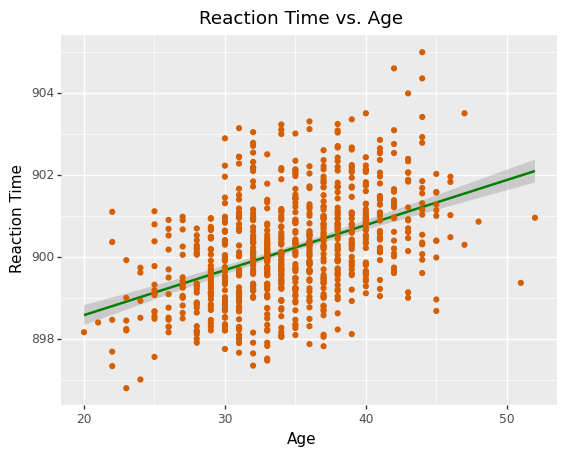

<ggplot: (8756447671761)>


In [3]:
conts = X_train[continous_variables]

conts = pd.concat([conts, y_train], axis = 1)
colour = ["#d55e00", "#cc79a7","#f0e442", "#0072b2"]
CVs = ["Age", "Boredom Rating", "Risk Propensity", "Height"]
i=0
t = "Reaction Time vs. " + CVs[i]
tx = CVs[i]
ty = "Reaction Time"
print(ggplot(conts, aes(x = continous_variables[i], y = "reaction_time")) + 
        stat_smooth(method = "lm", color = "green") + 
        labs(title = t,
        x = tx,
        y = ty) +
        geom_point(color = colour[i]))


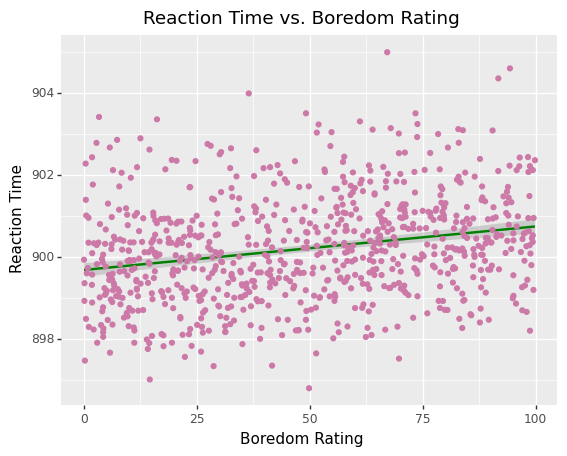

<ggplot: (8756450977701)>


In [4]:
conts = X_train[continous_variables]

conts = pd.concat([conts, y_train], axis = 1)
colour = ["#d55e00", "#cc79a7","#f0e442", "#0072b2"]
CVs = ["Age", "Boredom Rating", "Risk Propensity", "Height"]
i=1
t = "Reaction Time vs. " + CVs[i]
tx = CVs[i]
ty = "Reaction Time"
print(ggplot(conts, aes(x = continous_variables[i], y = "reaction_time")) + 
        stat_smooth(method = "lm", color = "green") + 
        labs(title = t,
        x = tx,
        y = ty) +
        geom_point(color = colour[i]))


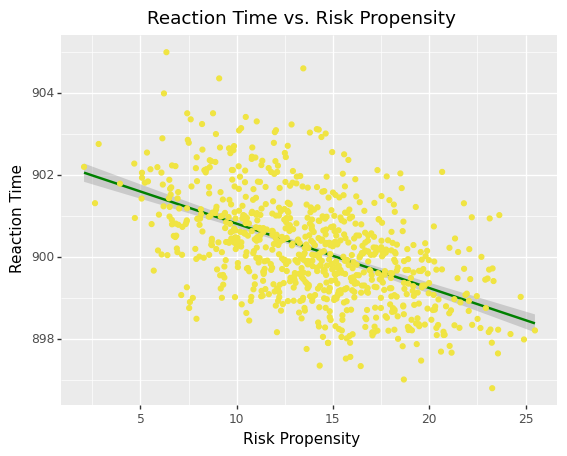

<ggplot: (8756405044177)>


In [5]:
conts = X_train[continous_variables]

conts = pd.concat([conts, y_train], axis = 1)
colour = ["#d55e00", "#cc79a7","#f0e442", "#0072b2"]
CVs = ["Age", "Boredom Rating", "Risk Propensity", "Height"]
i=2
t = "Reaction Time vs. " + CVs[i]
tx = CVs[i]
ty = "Reaction Time"
print(ggplot(conts, aes(x = continous_variables[i], y = "reaction_time")) + 
        stat_smooth(method = "lm", color = "green") + 
        labs(title = t,
        x = tx,
        y = ty) +
        geom_point(color = colour[i]))


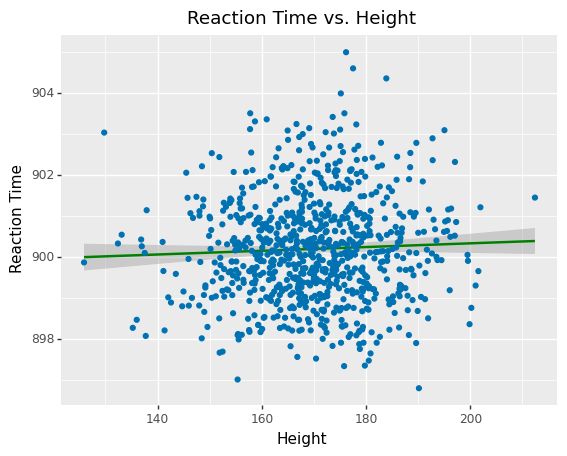

<ggplot: (8756405044185)>


In [6]:
conts = X_train[continous_variables]

conts = pd.concat([conts, y_train], axis = 1)
colour = ["#d55e00", "#cc79a7","#f0e442", "#0072b2"]
CVs = ["Age", "Boredom Rating", "Risk Propensity", "Height"]
i=3
t = "Reaction Time vs. " + CVs[i]
tx = CVs[i]
ty = "Reaction Time"
print(ggplot(conts, aes(x = continous_variables[i], y = "reaction_time")) + 
        stat_smooth(method = "lm", color = "green") + 
        labs(title = t,
        x = tx,
        y = ty) +
        geom_point(color = colour[i]))


b) <strong>Discuss</strong> in detail what you are checking for and specifically what you see for this model (regardless of the results, continue building the linear regression model, as we do not have any other alternatives yet). 

What we are checking for in these graph is to see if there is any obvious non-linearity to any of these models. (For example a curve upwards or downwards that is unaccounted for such as in a quadratic equation.)  These models seem to be pretty linear though.  That does not mean that the data looks like a bloated line, (height vs reaction_time certainly doesn't) but they all look like they can use a linear regression model.

c) check the assumption of homoscedasticity by plotting predicted reaction times and residuals using ggplot (using the training set). 

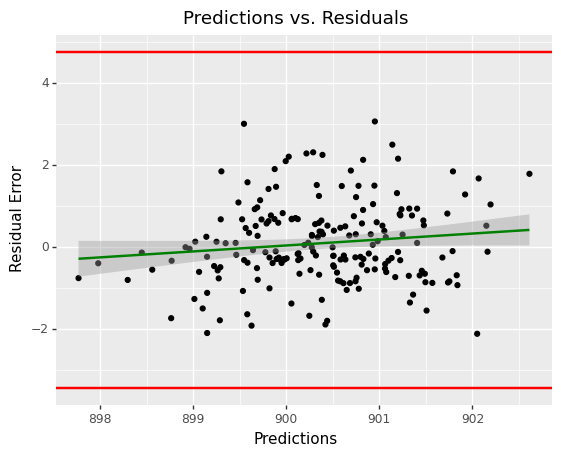

<ggplot: (8756403082397)>


In [7]:
predict_vs_residuals = pd.DataFrame({"error": y_test - y_pred, 
                            "predicted": y_pred})

#range intercept formula
r_max = db.max(axis=0)["reaction_time"]
r_min = db.min(axis=0)["reaction_time"]
r_mean = db.mean(axis=0)["reaction_time"]

r_upper_range = r_max-r_mean
r_lower_range = r_min-r_mean

#prediction vs residuals graph
print(ggplot(predict_vs_residuals, aes(x = "predicted", y = "error")) + 
      geom_point() +
      stat_smooth(method = "lm", color = "green") +
      geom_hline(yintercept = r_upper_range, color = "red", size = 1) +
      geom_hline(yintercept = r_lower_range, color = "red", size = 1) +
      labs(title = "Predictions vs. Residuals",
        x = "Predictions",
        y = "Residual Error"))



c) <strong>Discuss</strong> in detail what you are checking for and what patterns you see specifically for this model.

You asked us to check for homoscedasticity (meaning distribution across the central line).  I believe there is slight heteroscedasticity because it seems like the data (on the lower end of the predicted values) is more tightly grouped.  The error range seems to increase as the the predictions increase.  

P.S. I added the two horizontal verticies just so I had a better understanding of how bad the error was.  They are the maximum and minimum difference from the mean of the reaction time. They help give comparison for how bad some of the points did. (Don't worry, it doesn't effect the train-test split)

d) plot the actual vs. predicted reaction times (for both train an test set separately), as well as print out the mean <em>absolute</em> error for both <em>train</em> and <em>test</em> and $R^2$ for your model for both <em>train</em> and <em>test</em>.

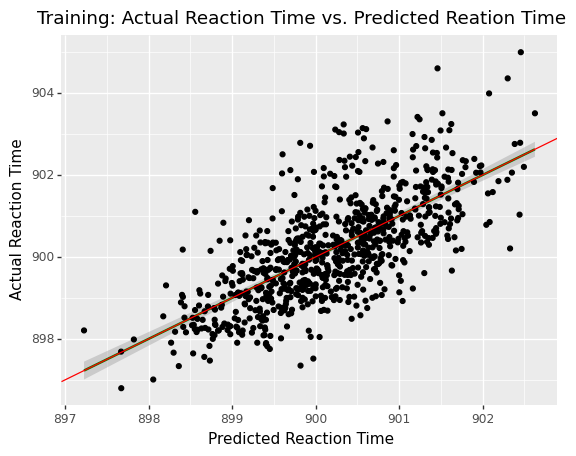

<ggplot: (8756447671717)>


In [8]:
#training graph
actual_vs_pred_train = pd.DataFrame({"predicted": y_confirm, 
                            "actual": y_train})

print(ggplot(actual_vs_pred_train, aes(x = "predicted", y = "actual")) + 
 stat_smooth(method = "lm", color = "green") + 
 geom_point() +
 geom_abline(slope=1, color ="red", intercept = 0) +
 labs(title = "Training: Actual Reaction Time vs. Predicted Reation Time",
        x = "Predicted Reaction Time",
        y = "Actual Reaction Time"))

In [9]:
#training mean absolute error
print("Training MAE Score:")
print(mean_absolute_error(y_train, y_confirm))

#training R^2
print("Training R^2 Score:")
print(r2_score(y_train, y_confirm))

Training MAE Score:
0.6981521713376675
Training R^2 Score:
0.49302720251395005


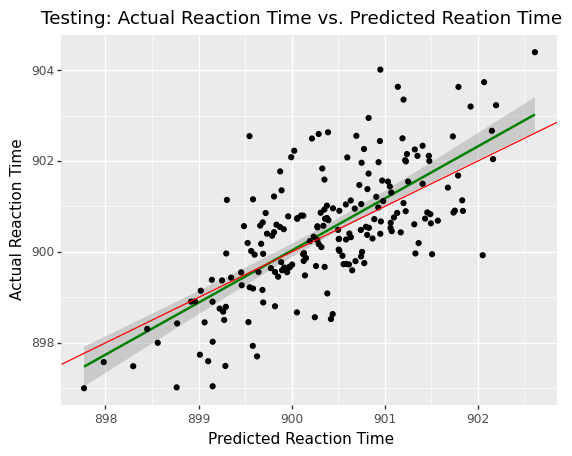

<ggplot: (8756403045821)>


In [10]:
#testing graph
actual_vs_pred_test = pd.DataFrame({"predicted": y_pred, 
                            "actual": y_test})

print(ggplot(actual_vs_pred_test, aes(x = "predicted", y = "actual")) + 
 stat_smooth(method = "lm", color = "green") + 
 geom_point() +
 geom_abline(slope=1, color ="red", intercept = 0) +
 labs(title = "Testing: Actual Reaction Time vs. Predicted Reation Time",
        x = "Predicted Reaction Time",
        y = "Actual Reaction Time"))

In [11]:
#testing mean absolute error
print("Testing MAE Score:")
print(mean_absolute_error(y_test, y_pred))

#testing R^2
print("Testing R^2 Score:")
print(r2_score(y_test, y_pred))

Testing MAE Score:
0.774210465039427
Testing R^2 Score:
0.49259536091332734


d) <strong>Discuss</strong> how well your model did based on these metrics, and how can you tell.

<font color='red'>The red line is the identity line!</font>

The graphs are helpful in showing that the actual vs. predicted scores of both training and testing were very spread out.  The MAE gives us a better picture of how bad that was.  On average, for both training and testing, the data was off by ~0.7.  The R^2 scores only got 0.5.  This pretty clearly shows that this model wasn't too great at predicting the values although it is better than just guessing with the mean.  

P.S. The MSE doesn't look too terrible in these graphs considering the total values of reaction time was around 900.  However, if you look back at my intercepts in part c.  The GREATEST DISTANCE from the mean was less than 5.  So an average difference of 0.7 is pretty substancial.

e) is your model overfit? <strong>Discuss</strong> in detail how you can tell.

There is no indication of overfitting.  (The training case did not out perform the test case) My guess is that model just isn't great for predictions in both the training set and test set.  

f) use ggplot to make a bar chart showing the coefficient values (x should be each coef name, the height of each bar should be the value of the coefficient). DO NOT include the intercept in this plot.

       Coef        Variables
0  0.514743              age
1  0.280316   boredom_rating
2 -0.634616  risk_propensity
3  0.021757           height


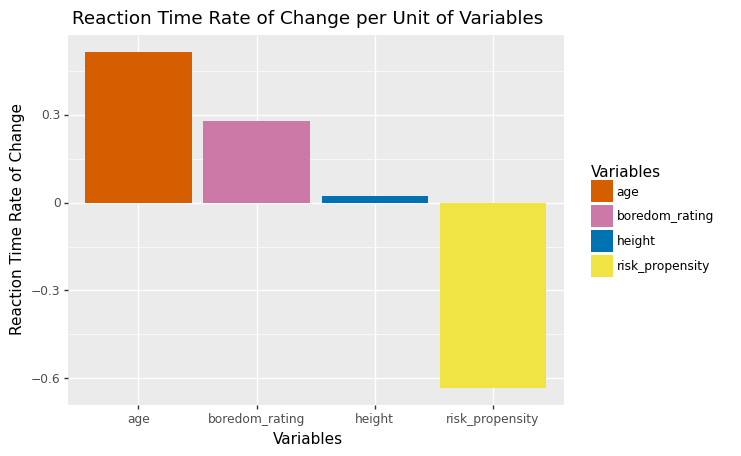

<ggplot: (8756400264457)>

In [12]:
coef = pd.DataFrame({"Coef": model.coef_,
                            "Variables": continous_variables})
print(coef)
#Reaction Time Rate of Change per Unit of Variables Graph
(ggplot(coef, aes(x = "Variables", y = "Coef", fill = "Variables" )) + 
 geom_bar(stat = "identity") +
 scale_fill_manual(["#d55e00", "#cc79a7", "#0072b2","#f0e442","#009e73"]) +
 labs(title = "Reaction Time Rate of Change per Unit of Variables",
        x = "Variables",
        y = "Reaction Time Rate of Change"))

f) Briefly <strong>discuss</strong> the impact of each variable on reaction time.

This graph helps show that the age and boredom rating had a possitive corilation with reaction time (for every 1  increase in age there was an estimated 0.514 increase in reaction time and for every 1 increase in boredom rating there was a 0.280 increase in reaction time).  Height had little-to-no correlation with reaction time (for every 1 increase in height there was a 0.022 increase in reaction time).  Finally, risk propensity had a negative corrilation with reaction time (for every 1 increase in risk propensity there was a 0.635 decrease in reaction time).


IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART
IGNORE THIS PART